In [1]:
!pip -q install networkx 
!pip -q install matplotlib

In [2]:
%matplotlib inline
import networkx as nx 
import random 
import matplotlib.pyplot as plt 

In [3]:
develop_data = "/Users/zyang/Documents/VSCode/DeepSpin/develop.data"
with open(develop_data, 'r') as fin: 
    lines = fin.readlines()


G = nx.DiGraph()
for line in lines: 
    node1, node2, _ = line.split('\t')
    for node in [node1, node2]: 
        node_lst = node.split(' ')
        node_pairs = []
        for i in range(len(node_lst)-1): 
            node_pairs.append((node_lst[i], node_lst[i+1]))
        G.add_edges_from(node_pairs)

In [4]:
print("number of queries: ", 2*len(lines))
print("\nnumber of nodes: ", G.number_of_nodes())
print("\nnumber of edges: ", G.number_of_edges())
print("\nedges/nodes: ", 2*G.number_of_edges()/G.number_of_nodes())

number of queries:  14708502

number of nodes:  166305

number of edges:  4990312

edges/nodes:  60.013974324283694


In [6]:
# analyze graph 
# https://mathoverflow.net/questions/6833/difference-between-connected-vs-strongly-connected-vs-complete-graphs
# Strongly connected is usually associated with directed graphs (one way edges): there is a route between every two nodes
components_list = list(nx.strongly_connected_components(G))
degree_lst = [d for n, d in G.degree()]
print("number of connected components" ,len(components_list))

print("\ntop 20 degrees: ", sorted(degree_lst)[-20:])

number of connected components 62189

top 20 degrees:  [13605, 13638, 13825, 14285, 14389, 14613, 14685, 14871, 15657, 15881, 17167, 19135, 19289, 20024, 20621, 29811, 31225, 34616, 42815, 54947]


In [7]:
# sorted(degree_lst, key=lambda x: x[1])[-20:]
g_dict = {n:d for n, d in G.degree()}
nodes = {n: d for n, d in sorted(g_dict.items(), key=lambda item: item[1])[-20:]}
nodes


{'design': 13605,
 'group': 13638,
 'co': 13825,
 'media': 14285,
 'shop': 14389,
 'life': 14613,
 'to': 14685,
 'tech': 14871,
 'for': 15657,
 'home': 15881,
 'of': 17167,
 'in': 19135,
 'my': 19289,
 'i': 20024,
 'e': 20621,
 'and': 29811,
 'a': 31225,
 'the': 34616,
 's': 42815,
 '-': 54947}

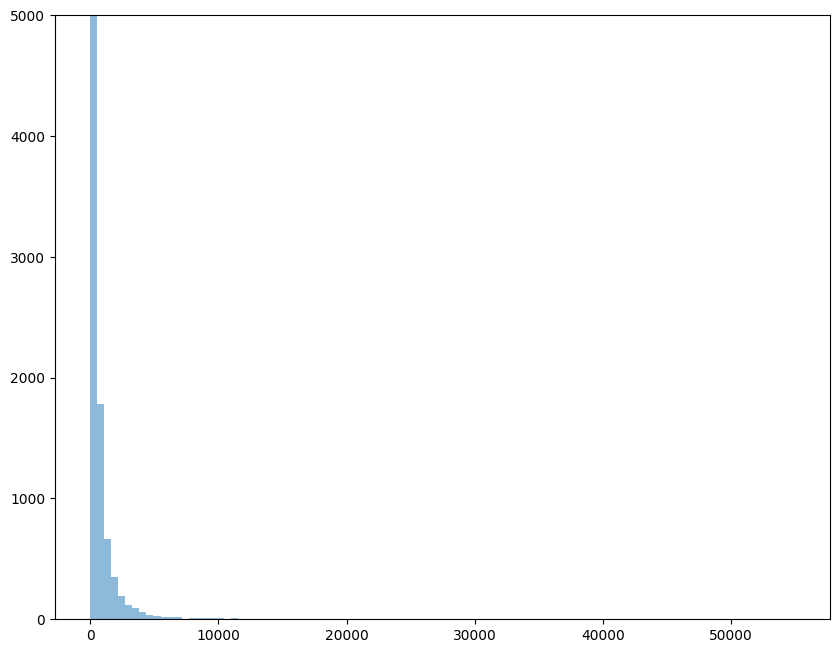

In [8]:
# a distribution of degrees 
fig, ax = plt.subplots(1, 1, figsize=(10,8), dpi=100)

ax.hist(degree_lst, alpha=0.5, bins=100)
# ax.set_xlim(0, 100)
ax.set_ylim(0, 5000)
plt.savefig("/Users/zyang/Documents/VSCode/DeepSpin/degree_dist_2.jpg")
# plt.show()

In [10]:
# get degree and neighbours

def get_random_token(): 
    random_index = random.randint(0, len(lines)-1)
    random_line = lines[random_index]
    random_index_2 = random.randint(0, 1)
    random_query = random_line.split('\t')[random_index_2]
    random_token_lst = random_query.split(' ')
    return random.choice(random_token_lst)

rand_token = get_random_token()
print(f"{rand_token} has direct neighbours: ", list(G.adj[rand_token]))
print(f"\n{rand_token}'s degree: ", G.degree[rand_token])

lien has direct neighbours:  ['filer', 'online', 's', 'investing', 'sales', 'sale', 'point', 'sphere', 'monitor', 'index', 'vegetables', 'properties', 'busters', 'solutions', 't', 'on', 'help', 'certificate', 'certificates', 'recording', 'recordings', 'productions', 'lawyer', 'customs', 'bloomfield', 'ojeda', 'ce', 'records', 'law', 'alert', 'conscience', 'spotter', 'buster', 'felter', 'rockstar', 'auction', 'mechanics', 'a', 'profits', 'auctions', 'solution', 'pros', 'n', 'analyzer', 'service', 'system', 'homes', 'technology', 'hoa', 'z', 'te', 'tele', 'cer', 'antique', 'hound', 'scenario', 'track', 'farm', 'cider', 'orchard', 'coaching', 'coach', 'coaches', 'tran', 'vo', 'network', 'calibration', 'ab', 'et', 'ins', 'academy', 'investor', 'buyers', 'flipping', 'flipper', 'flip', 'group', 'de', 'resolution', 'custom', 'investment', 'investments', 'tes', 'g', '-', 'md', 'yahoo', 'usa', 'education', 'living', 'and', 'cars', 'ho', 'talks', 'shares', 'chen', 'collections', 'removal', 'gone

In [11]:
# visualize a components 

def get_component(components, token): 
    for component in components: 
        if token in component: 
            return list(component) 
    raise Exception(f"{token} not in graph")


target_nodes = get_component(components_list, rand_token)
print("number of nodes in this component: ", len(target_nodes))
if len(target_nodes) < 10:
    nx.draw_shell(G.subgraph(target_nodes))


number of nodes in this component:  104113


In [12]:
print(target_nodes[:10])

['givney', 'brug', 'garge', 'ihe', 'alcance', 'vanek', 'divided', 'babushka', 'spire', 'deflation']


number of small components,  62188

component nodes:  {'fawning'}


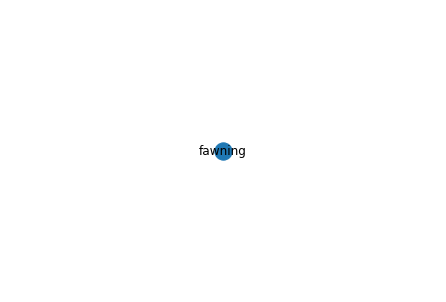

In [13]:
# visualize small components 

small_components = [component for component in components_list if len(component)<10]
print("number of small components, ", len(small_components))

rand_index = random.randint(0, len(small_components)-1)
target_component = small_components[rand_index]

print('\ncomponent nodes: ', target_component)
nx.draw_shell(G.subgraph(target_component), with_labels=True)
plt.show()

In [ ]:
# directed graph, realty -> realty agent , 
# weight, some writing are more popular than others 
# update graph near real-time, trending query, 20qps
# build edge based on pseudo edge, substring